In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
def sliding_average(data, window_size):
    """Calculate the sliding (moving) average of a dataset with edge handling."""
    pad_width = window_size // 2
    padded_data = np.pad(data, pad_width, mode='edge')
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    return smoothed_data

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/.dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/.dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [4]:
color0_light = np.array([0.5, 0.5, 0.5])
color1_light = np.array([1, 0.682, 0.286])
color2_light = np.array([0.008, 0.294, 0.478])
color3_light = np.array([0.267, 0.647, 0.761])

color0_dark = np.array([0.5, 0.5, 0.5])
color1_dark = np.array([1, 0.8, 0.5])
color2_dark = np.array([0.24, 0.58, 1.0])
color3_dark = np.array([0.4, 0.75, 0.85])

colors_light = {
    "color0": color0_light,
    "color1": color1_light,
    "color2": color2_light,
    "color3": color3_light,
}

colors_dark = {
    "color0": color0_dark,
    "color1": color1_dark,
    "color2": color2_dark,
    "color3": color3_dark,
}

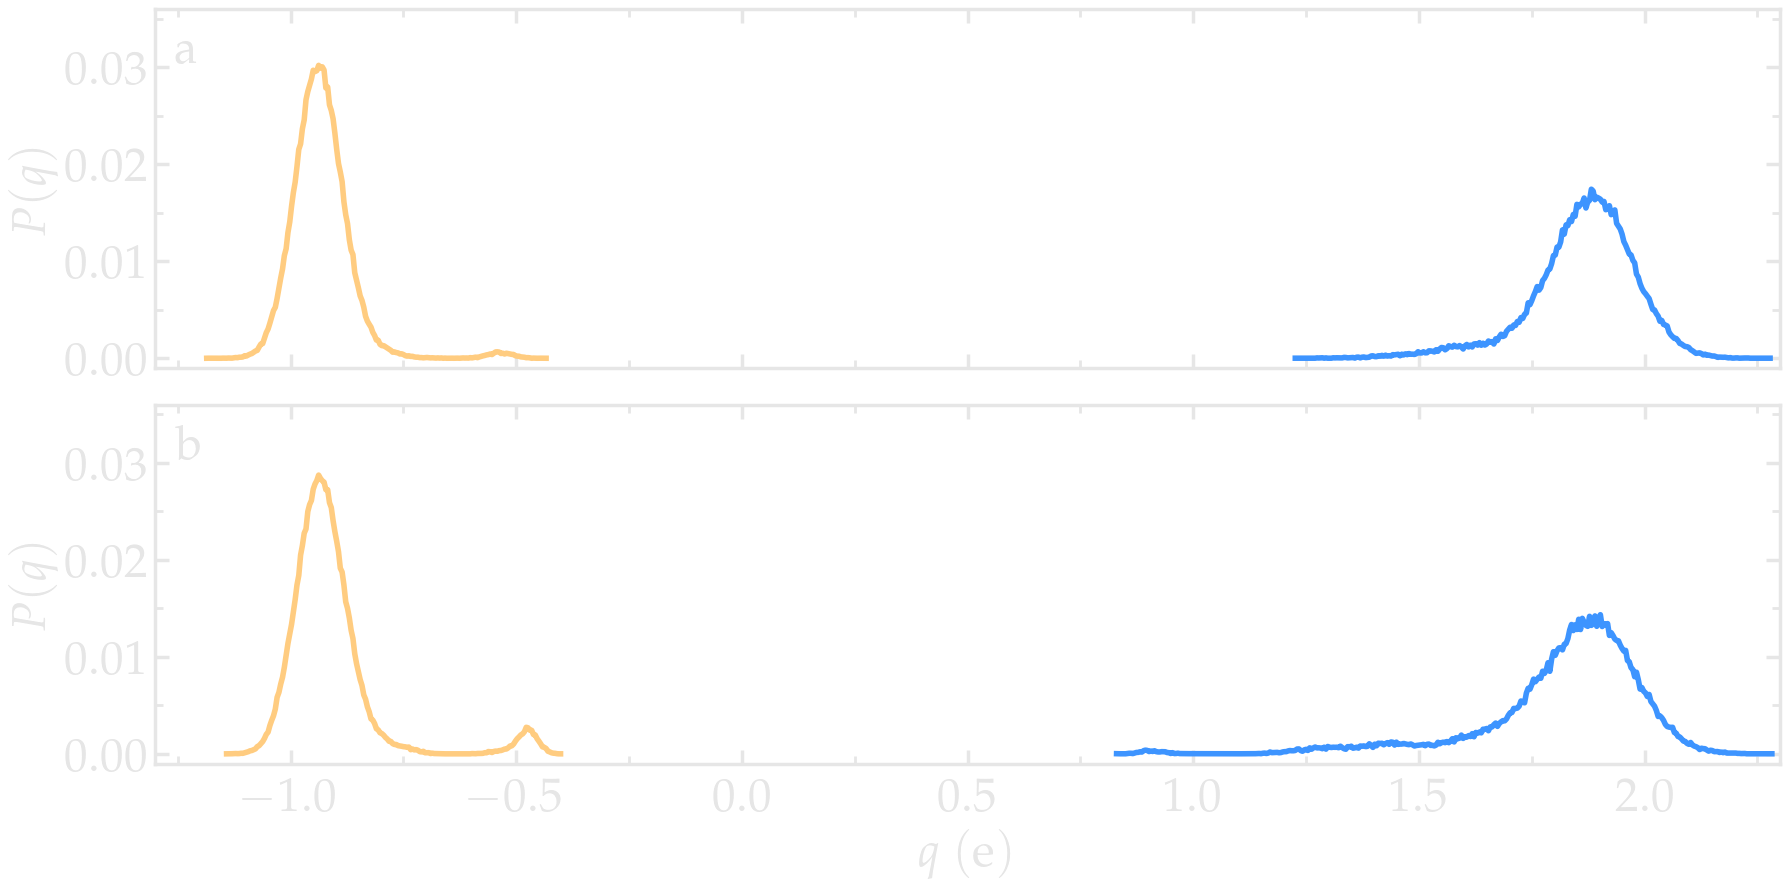

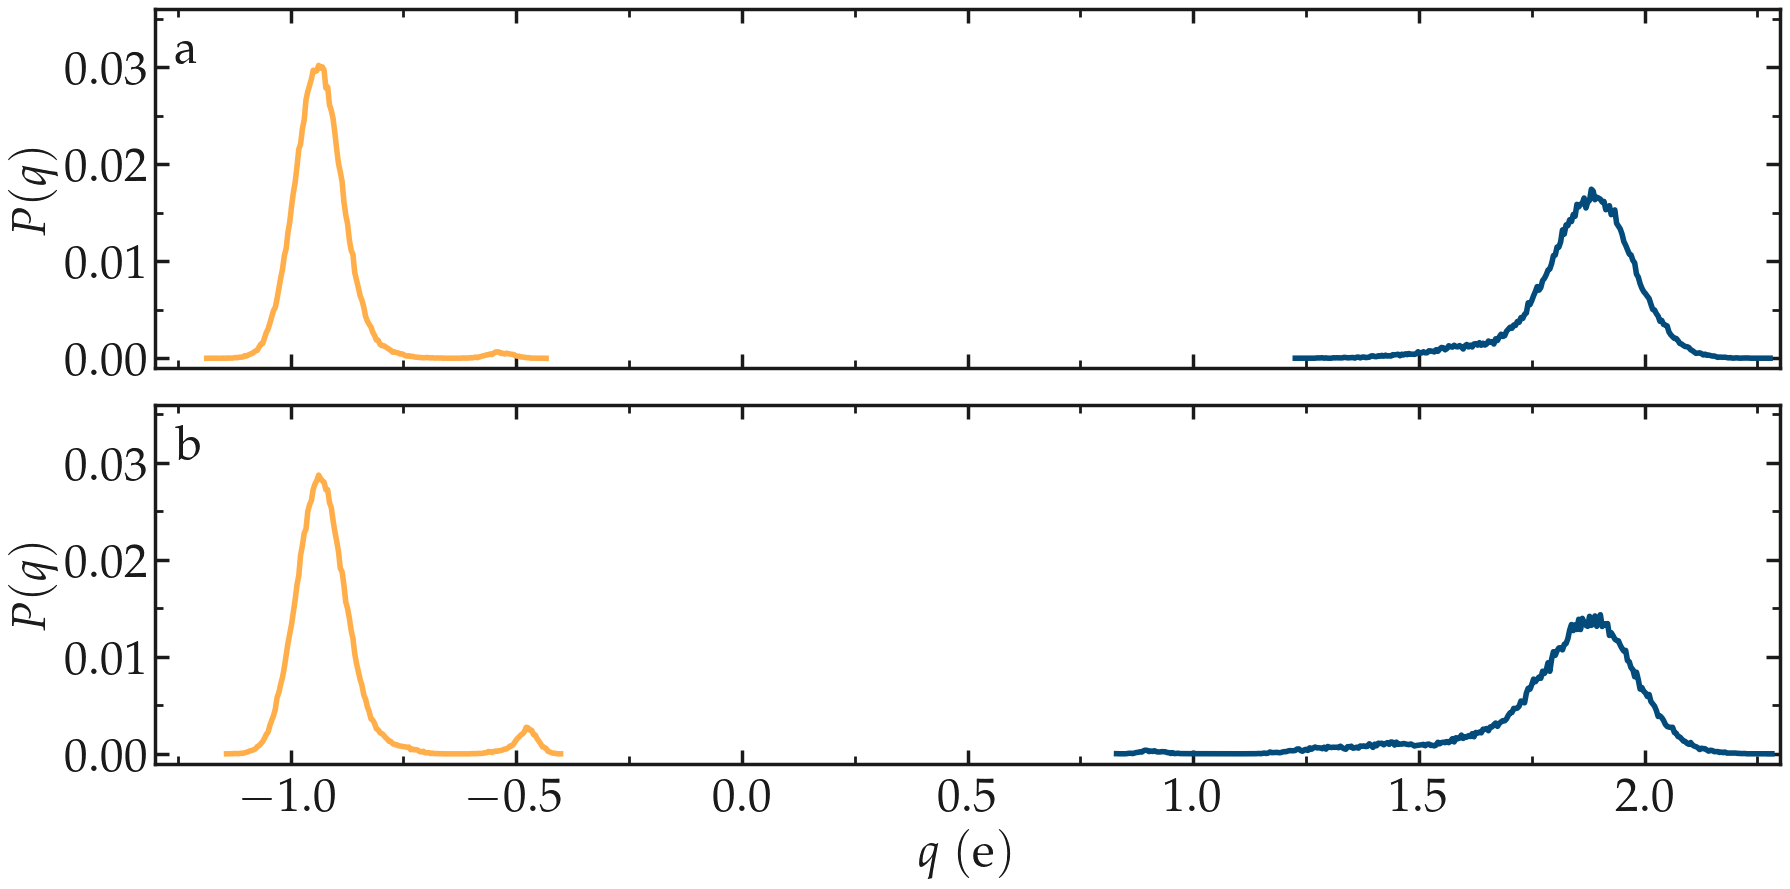

In [8]:
filename = "SIO-distribution"

for dark_mode in [True, False]:

    colors = colors_dark if dark_mode else colors_light
    globals().update(colors)
        
    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,9), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=1, n_line=2)

    hist_O = np.loadtxt(path_data + "relax-O.histo", skiprows=4)
    hist_Si = np.loadtxt(path_data + "relax-Si.histo", skiprows=4)

    # Panel a
    myplt.add_panel()
    myplt.add_plot(x = hist_Si[:,1][hist_Si[:,3]>0], y = hist_Si[:,3][hist_Si[:,3]>0], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12)
    myplt.add_plot(x = hist_O[:,1][hist_O[:,3]>0], y = hist_O[:,3][hist_O[:,3]>0], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12)
    myplt.complete_panel(ylabel = r'$P (q)$',
                        xlabel =None, xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(-1., 2.4, 0.5), y_ticks=np.arange(0, 0.031, 0.01),
                        x_boundaries=(-1.3, 2.3), y_boundaries=(-0.001, 0.036))

    hist_O = np.loadtxt(path_data + "deform-O.histo", skiprows=5009)
    hist_Si = np.loadtxt(path_data + "deform-Si.histo", skiprows=5009)

    # Panel a
    myplt.add_panel()
    myplt.add_plot(x = hist_Si[:,1][hist_Si[:,3]>0], y = hist_Si[:,3][hist_Si[:,3]>0], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12)
    myplt.add_plot(x = hist_O[:,1][hist_O[:,3]>0], y = hist_O[:,3][hist_O[:,3]>0], type = "plot", linewidth_data = 3,
                marker = "-", data_color = color1, markersize = 12)
    myplt.complete_panel(ylabel = r'$P (q)$',
                        xlabel = r'$q ~ (\mathrm{e})$', xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(-1., 2.4, 0.5), y_ticks=np.arange(0, 0.031, 0.01),
                        x_boundaries=(-1.3, 2.3), y_boundaries=(-0.001, 0.036))

    # Print figure
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)

In [14]:
log = lammps_logfile.File("deform.log")
timestep = 0.5 # fs
time = log.get("Step", run_num=0)*timestep/1000 # ps
Volume = log.get("Volume", run_num=0)/1000 # nm3
qSi = log.get("v_qSi", run_num=0)
qO = log.get("v_qO", run_num=0)
Temp = log.get("Temp", run_num=0)

time1 = log.get("Step", run_num=1)*timestep/1000 # ps
Volume1 = log.get("Volume", run_num=1)/1000 # nm3
qSi1 = log.get("v_qSi", run_num=1)
qO1 = log.get("v_qO", run_num=1)
Temp1 = log.get("Temp", run_num=1)

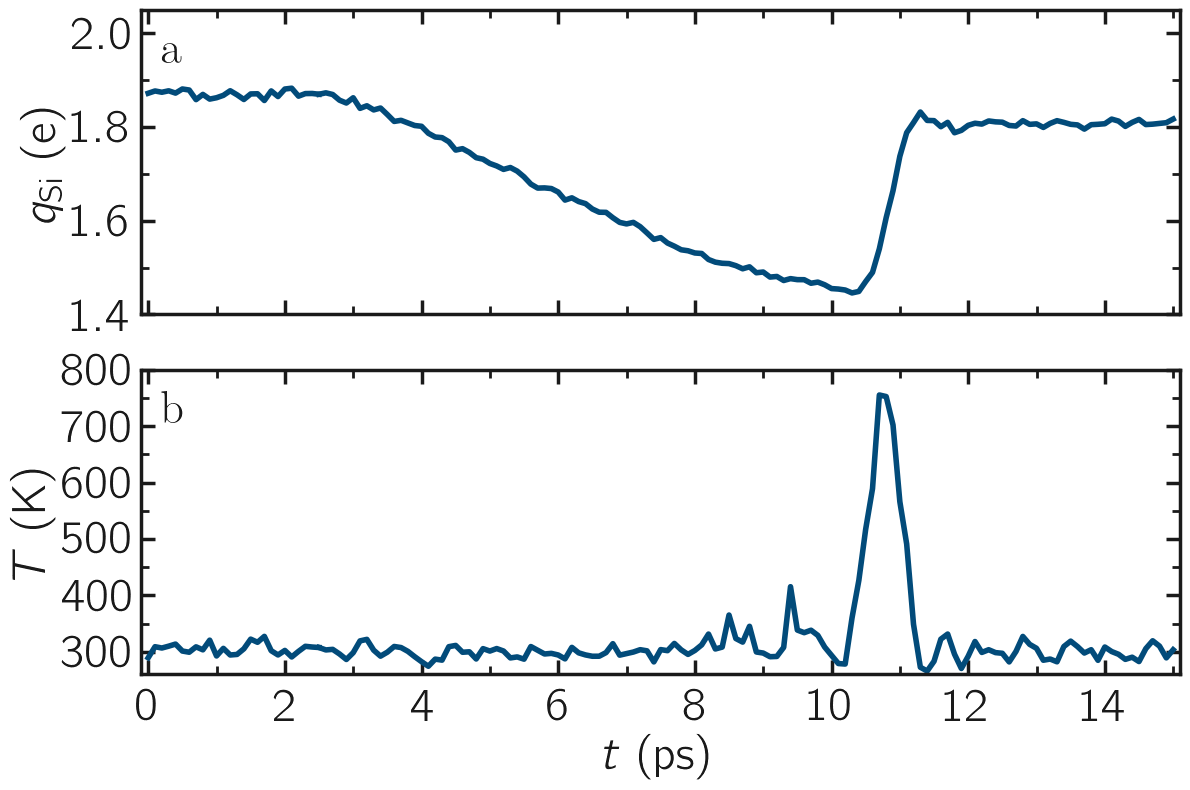

In [25]:
filename = "SIO-deformed-charge"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = time, y = qSi, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time1, y = qSi1, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$q_\mathrm{Si} ~ (\mathrm{e})$',
                     xlabel = None, xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 15.1, 2), y_ticks=np.arange(1.4, 2.08, 0.2),
                    x_boundaries=(-0.1, 15.1), y_boundaries=(1.4, 2.05))

# Panel b
myplt.add_panel()

myplt.add_plot(x = time, y = Temp, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time1, y = Temp1, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)

"""
timeA = sliding_average(time, 3)
TempA = sliding_average(Temp, 3)
time1A = sliding_average(time1, 3)
Temp1A = sliding_average(Temp1, 3)
myplt.add_plot(x = timeA, y = TempA, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time1A, y = Temp1A, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
"""

myplt.complete_panel(ylabel = r'$T ~ (\mathrm{K})$',
                     xlabel = r'$t ~ (\mathrm{ps})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 15.1, 2), y_ticks=np.arange(300, 801, 100),
                    x_boundaries=(-0.1, 15.1), y_boundaries=(260, 800))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)